<a href="https://colab.research.google.com/github/worklifesg/Computer-Vision-Algorithms-and-Projects/blob/main/3-Siamese%20Networks/1_image_pairs_siamese_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 align='center'> Building Image Pairs for Siamese Networks </h2>

#### 1. Import Libraries

In [1]:
from tensorflow.keras.datasets import mnist
from imutils import build_montages
import numpy as np
import cv2

* We will use MNIST digits dataset and define **make_pairs** function that will be provided with **image** and **label**.

* To visually validate out pair generation process is working correctly, we can use ```build_montages``` function to create montage of images at once.

#### 2. Defining function to make pairs of images

In [2]:
def make_pairs(images,labels):

  #First we need to initialize image pairs (image,image) and labels (positive or negative) empty lists
  pairImages=[]
  pairLabels=[]

  #In our case images are digits visuals and classes are (0,9)

  #compute total number of unique class labels 
  numClasses = len(np.unique(labels)) #total number of classes
  idx = [np.where(labels == i)[0] for i in range(0,numClasses)] #list of indices for each class label

  #to loop over all images

  for idxA in range(len(images)):
    currentImage = images[idxA] #grab current image
    label = labels[idxA] #grab current image's label

    idxB = np.random.choice(idx[label]) #randomly pick an image corresponding to same class
    posImage = images[idxB] #label

    pairImages.append([currentImage,posImage]) #positive pair list updation
    pairLabels.append([1]) #indicating positive pair as 1

    negIdx = np.where(labels!= label)[0] #grab the indices where labels are not same as current label
    negImage = images[np.random.choice(negIdx)] #randomly picks an image where label is not same

    pairImages.append([currentImage,negImage]) #negative pair list update
    pairLabels.append([0]) #assigning '0' as negative pair

  return (np.array(pairImages),np.array(pairLabels))

#### 3. Loading data and making positive and negative pairs

In [3]:
from google.colab.patches import cv2_imshow

#loading MNIST dataset
(trainX,trainY), (testX,testY) = mnist.load_data()
#loading positive and negative pairs
(pairTrain, labelTrain) = make_pairs(trainX,trainY)
(pairTest,labelTest) = make_pairs(testX,testY)

#### 4. Building montage of images

In [4]:
images =[]

for i in np.random.choice(np.arange(0,len(pairTrain)),size=(49,)):
  #sample over 49 randomly selected images from training pair images
  #grab current image pair and label
  imageA = pairTrain[i][0]
  imageB = pairTrain[i][1]
  label=labelTrain[i]
  
  #for better visualization with padding
  output = np.zeros((36,60),dtype='uint8')
  pair = np.hstack([imageA,imageB]) #horizontally stack the two images
  output[4:32, 0:56] = pair #padding with 4 pixels from top,bottom,right borders

  #text label in visualization
  text = 'neg' if label[0] == 0 else 'pos'
  color = (0,0,255) if label[0]== 0 else (0,255,0)

  #creating a three channel RGB image
  vis = cv2.merge([output]*3)

  #resizing and writing the text
  vis = cv2.resize(vis,(96,51),interpolation=cv2.INTER_LINEAR)
  cv2.putText(vis,text,(2,12),cv2.FONT_HERSHEY_SIMPLEX,0.75,color,2)

  images.append(vis) #append pairs of visualized images to images list


#### 5. Final Execution

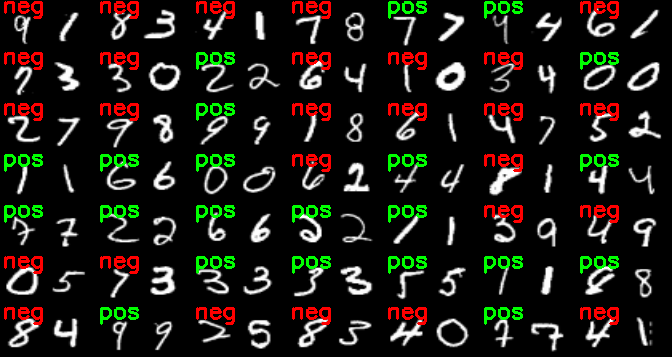

True

In [5]:
montage = build_montages(images, (96,51),(7,7))[0]

cv2_imshow(montage)
cv2.imwrite('Image_Pairs.jpg',montage)